# 5. Algol

## 5.1. Notebook setup

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee
import corner
import warnings
warnings.filterwarnings('ignore')

## 5.2. <a href="https://www.dropbox.com/sh/hkkdw1pdpt76kfb/AACVh44utUvSsedKgkMG8UeJa?dl=0">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── Algol_chain.h5
│   ├── Algol_data.txt
│   ├── Algol_I_models.txt
│   ├── Algol_lmfit_params.txt
│   ├── Algol_V_models.txt
│   ├── model_sed_freqs.txt
│   ├── thermal-gs.mplstyle
│   ├── ...
├── figures
│   ├── Algol_corner.pdf
│   ├── Algol_corner.png
│   ├── Algol_SED.pdf
│   ├── Algol_SED.png
│   ├── ...
├── notebooks
│   ├── algol.ipynb
│   ├── ...
.
.
.

## 5.3. Load

In [3]:
freqs_model = np.loadtxt('../data/model_sed_freqs.txt').T
I_models_1 = np.loadtxt('../data/Algol_I_models_1.txt')
V_models_1 = np.loadtxt('../data/Algol_V_models_1.txt')
I_models_2 = np.loadtxt('../data/Algol_I_models_2.txt')
V_models_2 = np.loadtxt('../data/Algol_V_models_2.txt')
freqs_obs, I_obs, sI_obs, V_obs, sV_obs = np.loadtxt('../data/Algol_data.txt', unpack=True)

sampler = emcee.backends.HDFBackend('../data/Algol_chain.h5')
samples = sampler.get_chain(flat=True)
samples /= np.array([1, 1, 1, 1, np.pi/180, np.pi/180])
lmfit_params = np.loadtxt('../data/Algol_lmfit_params.txt')
lmfit_params /= np.array([1, 1, 1, 1, np.pi/180, np.pi/180])

plt.style.use('../data/thermal-gs.mplstyle')

## 5.4. Plot

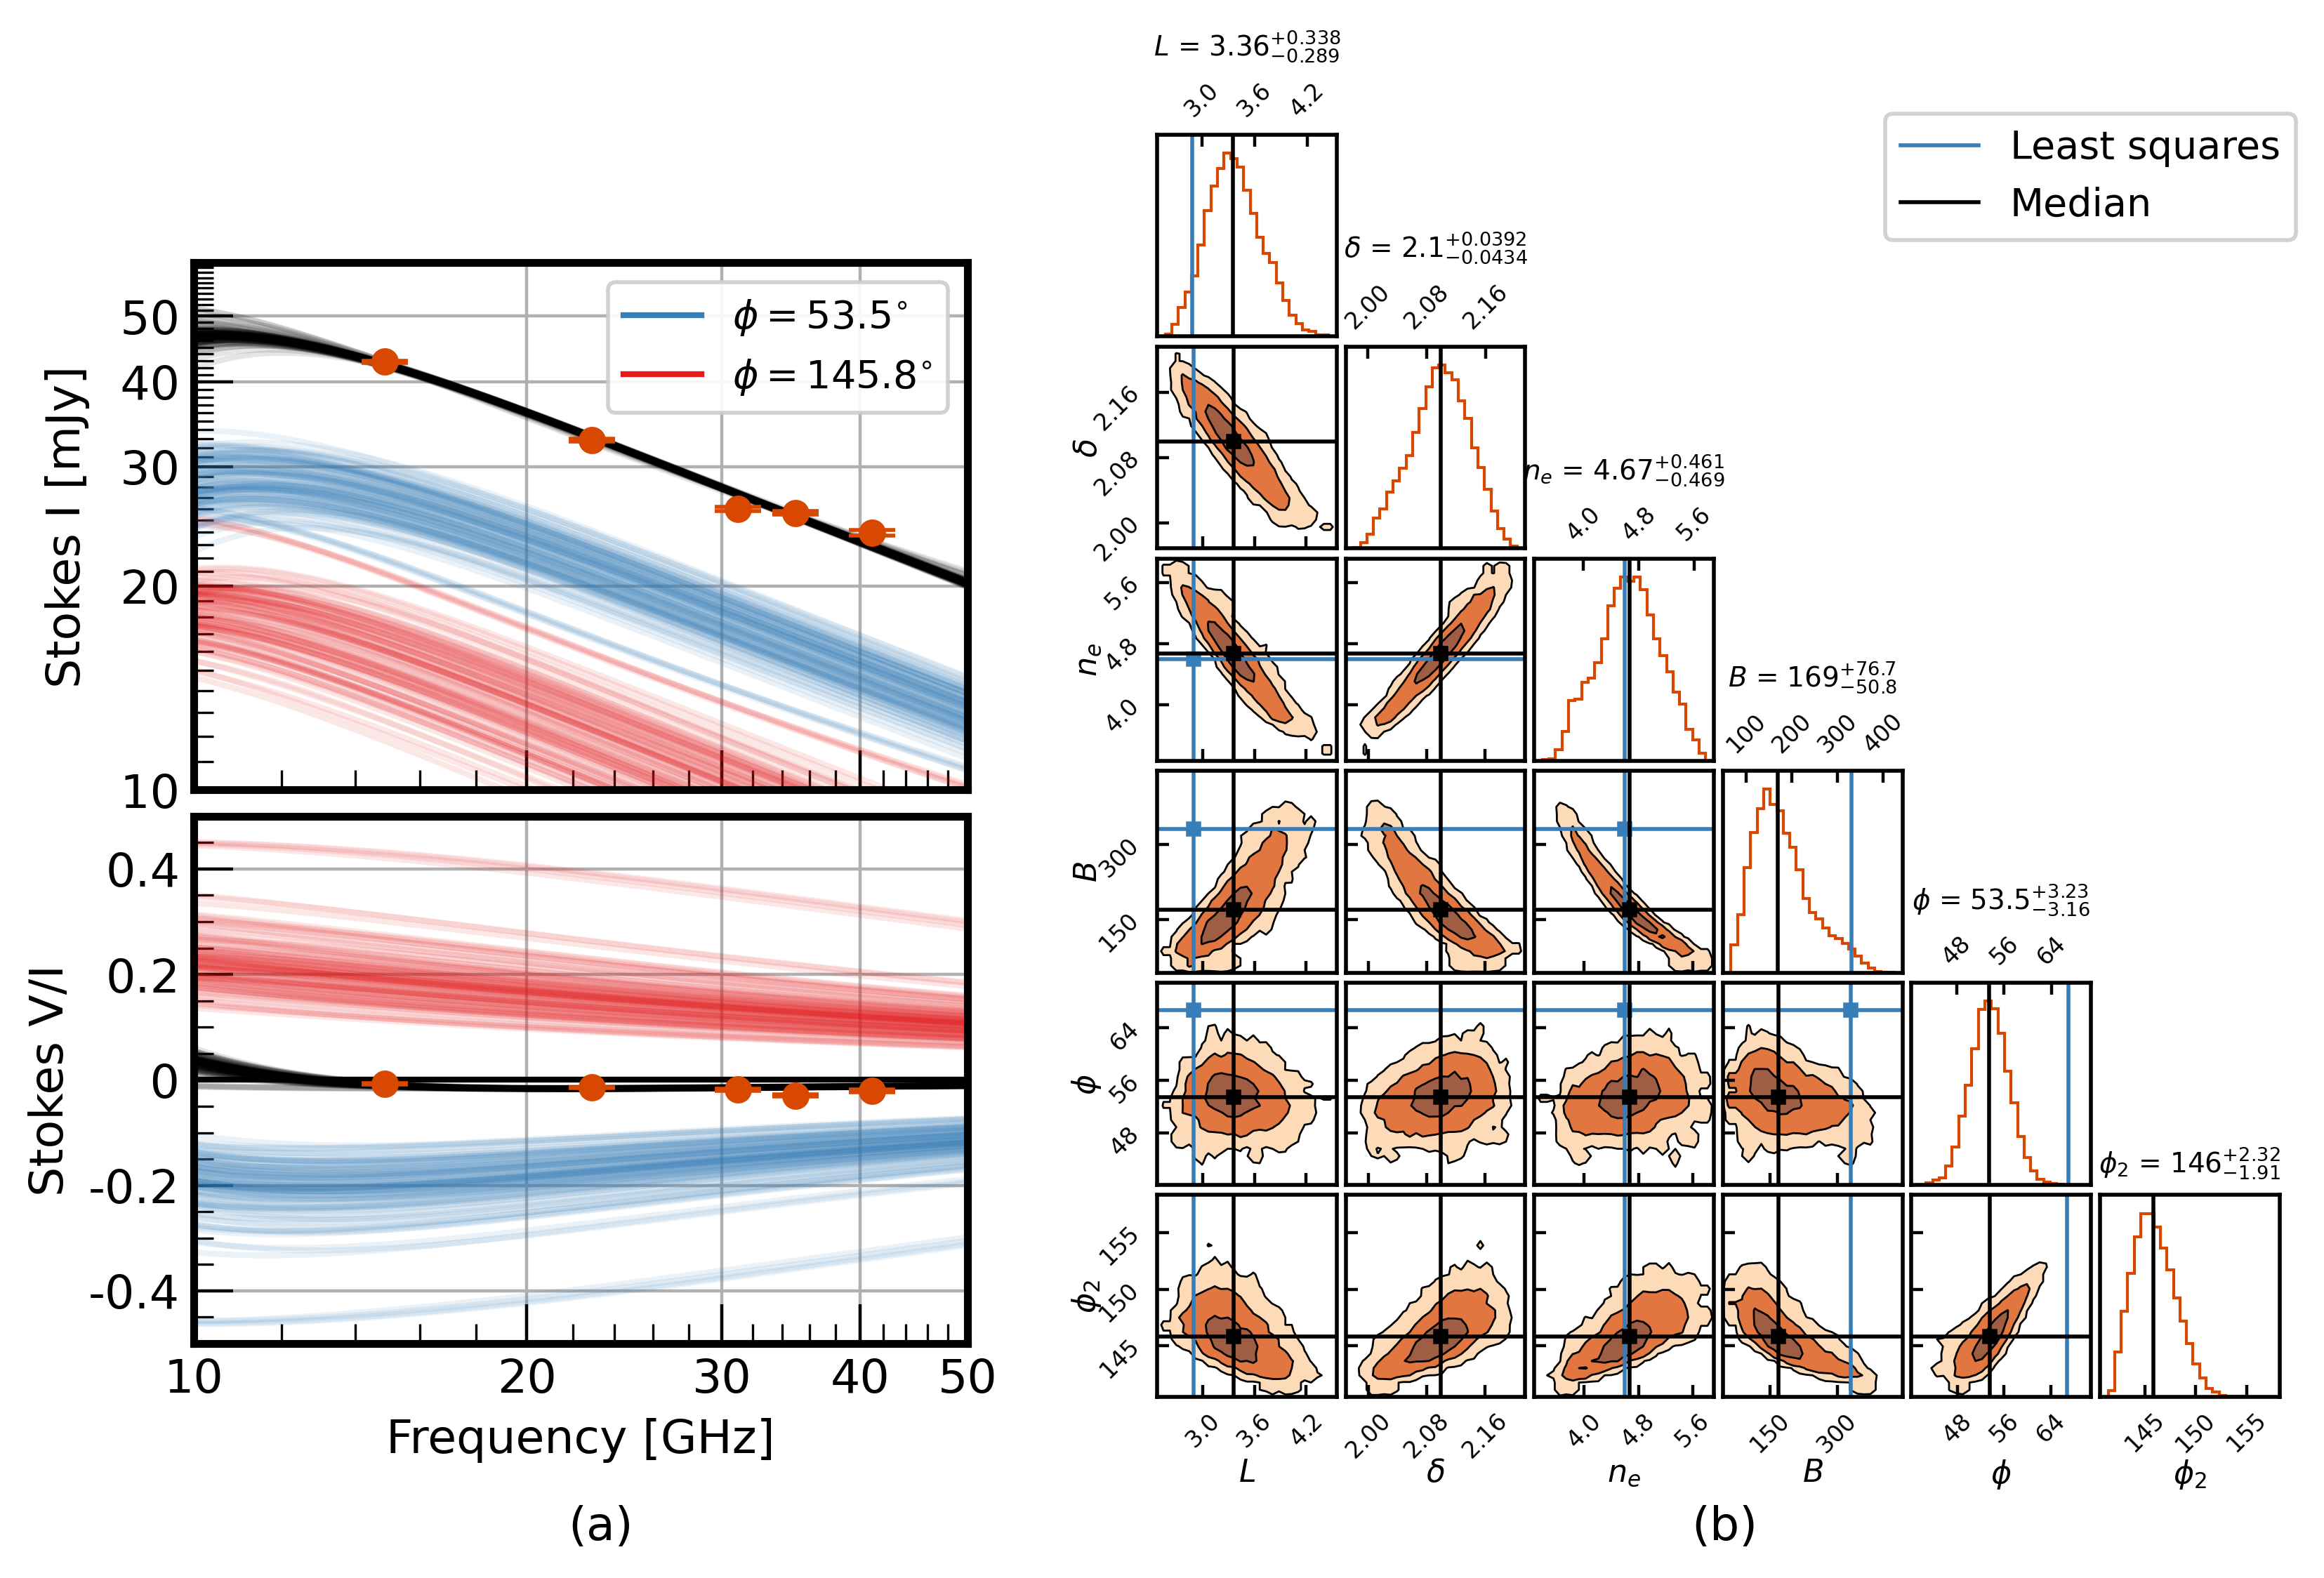

In [4]:
cmap = mpl.cm.get_cmap('Oranges'); cmap.set_under(color='w')
plt_labels = ['$L$', '$\delta$', '$n_e$', '$B$', '$\phi$', '$\phi_2$']
thin = 10000
median_values = np.median(samples[::thin, :], axis=0)

fig = plt.figure(figsize=(8, 5))
subfigs = fig.subfigures(1, 2, hspace=0, wspace=0, width_ratios=[1, 1.25], height_ratios=[1])
ax0 = subfigs[0].subplots(2, 1, sharex=True)
subfigs[0].subplots_adjust(hspace=0.05, wspace=0)

ax1 = subfigs[1].subplots(6, 6)

# Stokes I  
ax0[0].set_ylabel('Stokes I [mJy]')
ax0[0].set_xlim(10, 50)
ax0[0].set_ylim(10, 60)

ax0[0].set_xscale('log')
ax0[0].set_yscale('log')
ax0[0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax0[0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax0[0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax0[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax0[0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax0[0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax0[0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax0[0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=50, subs=np.arange(10, 60)*0.1))
ax0[0].grid()

for i in range(len(I_models_1)):
    ax0[0].plot(freqs_model, I_models_1[i]+I_models_2[i], color='black', alpha=0.1)
    ax0[0].plot(freqs_model, I_models_1[i], color='C0', alpha=0.1, label=r'$\phi=%.1f^{\circ}$' % median_values[4])
    ax0[0].plot(freqs_model, I_models_2[i], color='C1', alpha=0.1, label=r'$\phi=%.1f^{\circ}$' % median_values[5])
ax0[0].errorbar(freqs_obs, I_obs, yerr=sI_obs, marker='o', color=cmap(0.75), linestyle='')

# Stokes V/I
ax0[1].axhline(y=0, color='black')
ax0[1].set_xlabel('Frequency [GHz]')
ax0[1].set_ylabel('Stokes V/I')
ax0[1].set_ylim(-0.5, 0.5)

ax0[1].set_xscale('log')
ax0[1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax0[1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax0[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax0[1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax0[1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax0[1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax0[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax0[1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax0[1].grid()

for i in range(len(V_models_1)):
    ax0[1].plot(freqs_model, (V_models_1[i]+V_models_2[i])/(I_models_1[i]+I_models_2[i]), color='black', alpha=0.1)
    ax0[1].plot(freqs_model, V_models_1[i]/(I_models_1[i]+I_models_2[i]), color='C0', alpha=0.1)
    ax0[1].plot(freqs_model, V_models_2[i]/(I_models_1[i]+I_models_2[i]), color='C1', alpha=0.1)
ax0[1].errorbar(freqs_obs, V_obs/I_obs, yerr=np.sqrt((sI_obs/I_obs)**2+(sV_obs/V_obs)**2)*np.abs(V_obs/I_obs), 
    marker='o', color=cmap(0.75), linestyle='')

# Corner plot
cornerFig = corner.corner(samples[::thin, :],color='black',top_ticks=True,quiet=True, show_titles=True,use_math_text=True,
labels=plt_labels,plot_datapoints=False, title_quantiles=[0.16, 0.5, 0.84], label_kwargs={"fontsize":8}, 
title_kwargs={"fontsize":7}, max_n_ticks=4, bins=25, title_fmt='3.3g', plot_density=False, fill_contours=True,
levels=(0.393, 0.865, 0.989), hist_kwargs={'linewidth':0.75, 'color':cmap(0.75)}, fig=subfigs[1], 
contour_kwargs={'linewidths':0.5, 'colors':'black'}, 
contourf_kwargs={'colors':(cmap(-1), cmap(0.25), cmap(0.75), cmap(0.999)), 'alpha':0.75})
corner.overplot_lines(cornerFig, lmfit_params, color='C0', label='Least squares', lw=1)
corner.overplot_points(cornerFig, np.array([lmfit_params]), color='C0', marker='s', ms=3)
corner.overplot_lines(cornerFig, median_values, color='black', label='Median', lw=1)
corner.overplot_points(cornerFig, np.array([median_values]), color='black', marker='s', ms=3)

for axis in cornerFig.axes:
    for side in ['top','bottom','left','right']:
        axis.spines[side].set_linewidth(1)
    axis.tick_params(axis='both', which='major', labelsize=6, length=3)

# Final setup
handles,labels = ax0[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax0[0].legend(by_label.values(), by_label.keys(), loc='upper right')
legend.legendHandles[0].set_alpha(1)
legend.legendHandles[1].set_alpha(1)

handles,labels = subfigs[1].gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
subfigs[1].legend(by_label.values(), by_label.keys(), fontsize=10, loc='upper right') 

subfigs[0].text(0.5, -0.03, '(a)', fontsize=12) 
subfigs[1].text(0.5, -0.03, '(b)', fontsize=12)

fig.set_facecolor('white')
fig.savefig('../figures/Algol.png', bbox_inches='tight')
fig.savefig('../figures/Algol.pdf', bbox_inches='tight')
fig.show()